In [ ]:
import numpy as np 
import pandas as pd           
import os
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
oasisdf = pd.read_csv("/content/drive/MyDrive/oasis_longitudinal.csv")
oasisdf.tail(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


Null Values

In [ ]:
oasisdf.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
oasisdf.dropna().describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,1.884181,601.353107,77.033898,14.703390,2.460452,27.409605,0.271186,1489.991525,0.729879,1.193780
std,0.925330,640.596081,7.811808,2.895662,1.134005,3.712626,0.370537,175.768462,0.037842,0.136821
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1358.250000,0.699000,1.100250
50%,2.000000,559.500000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.500000,0.729000,1.193500
75%,2.000000,882.500000,82.000000,16.750000,3.000000,30.000000,0.500000,1595.250000,0.757000,1.292500
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
oasisdf.dropna(axis=1).describe()

,Visit,MR Delay,Age,EDUC,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
oasisdf['SES'].describe()

count    354.000000
mean       2.460452
std        1.134005
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
oasisdf['SES'] = imp.fit_transform(oasisdf[['SES']])

oasisdf['SES'].describe()

count    373.000000
mean       2.460452
std        1.104665
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: SES, dtype: float64

In [ ]:
oasisdf['MMSE'].describe()

count    371.000000
mean      27.342318
std        3.683244
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
oasisdf['MMSE'] = imp.fit_transform(oasisdf[['MMSE']])

oasisdf['MMSE'].describe()

count    373.000000
mean      27.342318
std        3.673329
min        4.000000
25%       27.000000
50%       29.000000
75%       30.000000
max       30.000000
Name: MMSE, dtype: float64

Variable Normalisation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
oasisdfScaled = mms.fit_transform(oasisdf[['SES', 'EDUC']])
oasisdf[['SES', 'EDUC']] = oasisdfScaled
oasisdf[['SES', 'EDUC']].describe()

,SES,EDUC
count,373.000000,373.000000
mean,0.365113,0.505756
std,0.276166,0.169196
min,0.000000,0.000000
25%,0.250000,0.352941
50%,0.250000,0.529412
75%,0.500000,0.588235
max,1.000000,1.000000


In [ ]:
oasisdf.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,0.470588,0.250000,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,0.470588,0.250000,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,0.352941,0.365113,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,0.352941,0.365113,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,0.352941,0.365113,22.0,0.5,1698,0.701,1.034


One Hot Encoding

In [ ]:
oasisdf = pd.get_dummies(oasisdf, columns = ['M/F', 'Group']) 
oasisdf.head()

,Subject ID,MRI ID,Visit,MR Delay,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_F,M/F_M,Group_Converted,Group_Demented,Group_Nondemented
0,OAS2_0001,OAS2_0001_MR1,1,0,R,87,0.470588,0.250000,27.0,0.0,1987,0.696,0.883,0,1,0,0,1
1,OAS2_0001,OAS2_0001_MR2,2,457,R,88,0.470588,0.250000,30.0,0.0,2004,0.681,0.876,0,1,0,0,1
2,OAS2_0002,OAS2_0002_MR1,1,0,R,75,0.352941,0.365113,23.0,0.5,1678,0.736,1.046,0,1,0,1,0
3,OAS2_0002,OAS2_0002_MR2,2,560,R,76,0.352941,0.365113,28.0,0.5,1738,0.713,1.010,0,1,0,1,0
4,OAS2_0002,OAS2_0002_MR3,3,1895,R,80,0.352941,0.365113,22.0,0.5,1698,0.701,1.034,0,1,0,1,0


CHANGE OF TYPE VARIABLES OBJECT TO INTEGER

In [ ]:
list(set(oasisdf.dtypes.tolist()))

[dtype('O'), dtype('uint8'), dtype('float64'), dtype('int64')]

In [ ]:
oasisdf['Group_Demented'] = oasisdf['Group_Demented'].astype(np.float64)
oasisdf['Group_Demented'].dtypes

dtype('float64')

In [ ]:
df_num = oasisdf.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Demented
0,1,0,87,0.470588,0.250000,27.0,0.0,1987,0.696,0.883,0.0
1,2,457,88,0.470588,0.250000,30.0,0.0,2004,0.681,0.876,0.0
2,1,0,75,0.352941,0.365113,23.0,0.5,1678,0.736,1.046,1.0
3,2,560,76,0.352941,0.365113,28.0,0.5,1738,0.713,1.010,1.0
4,3,1895,80,0.352941,0.365113,22.0,0.5,1698,0.701,1.034,1.0


EXPLORATORY ANALYSIS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

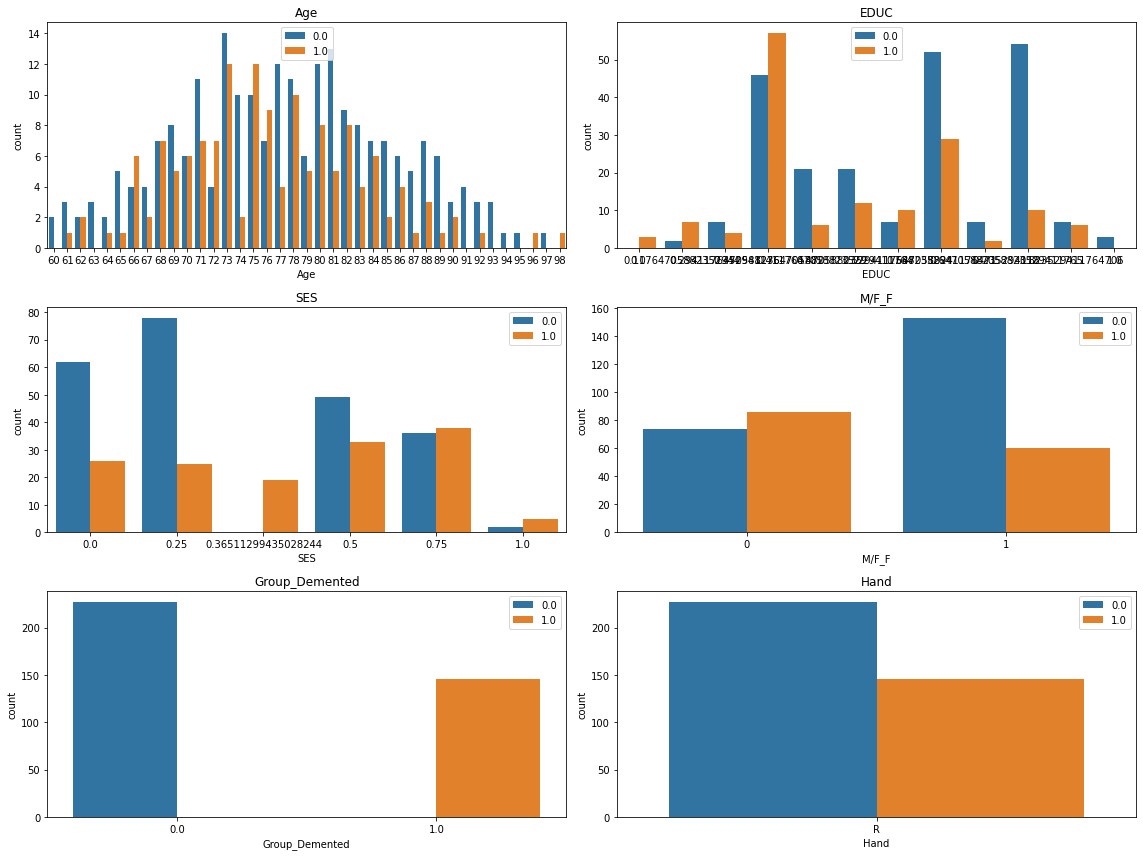

In [ ]:
cols = ['Age', 'EDUC', 'SES', 'M/F_F', 'Group_Demented', 'Hand']
nr_rows = 3
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*8,nr_rows*4))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        
        i = r*nr_cols+c       
        ax = axs[r][c]
        sns.countplot(oasisdf[cols[i]], hue=oasisdf["Group_Demented"], ax=ax)
        ax.set_title(cols[i])
        ax.legend() 
        
plt.tight_layout() 

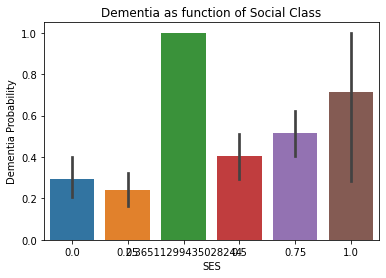

In [ ]:
sns.barplot(x='SES', y='Group_Demented', data=oasisdf)
plt.ylabel("Dementia Probability")
plt.title("Dementia as function of Social Class")
plt.show()

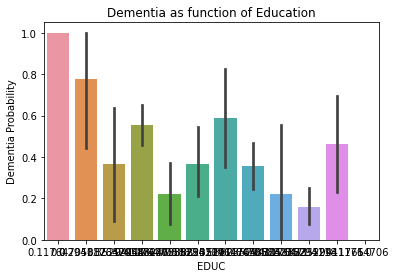

In [ ]:
sns.barplot(x='EDUC', y='Group_Demented', data=oasisdf)
plt.ylabel("Dementia Probability")
plt.title("Dementia as function of Education")
plt.show()

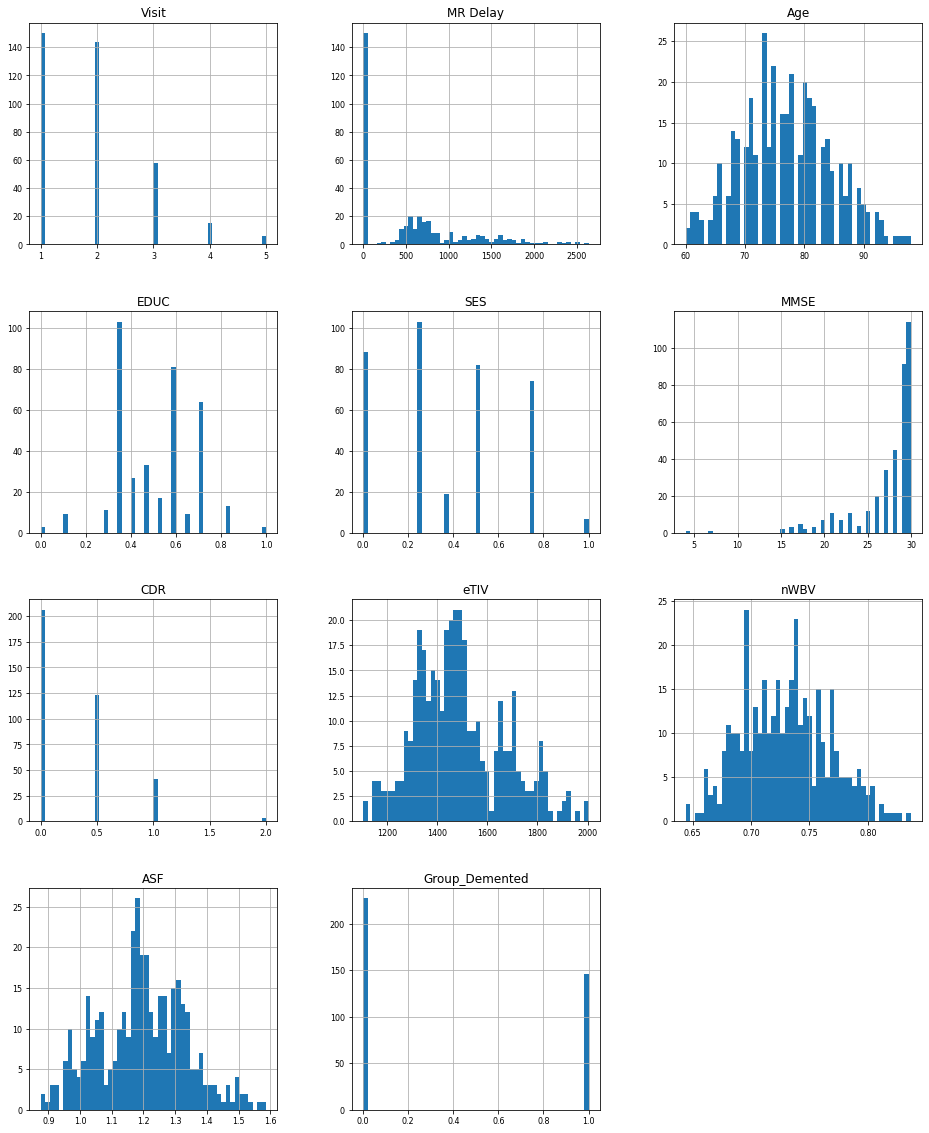

In [ ]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
oasisdf_num_corr = oasisdf.corr()['Group_Demented'][:-1]
golden_features_list = oasisdf_num_corr[abs(oasisdf_num_corr) > 0.2].sort_values(ascending=False)
print("There are {} strongly correlated values with Group_Demented:\n{}".format(len(golden_features_list), golden_features_list))

There are 8 strongly correlated values with Group_Demented:
Group_Demented     1.000000
CDR                0.815473
M/F_M              0.259405
EDUC              -0.258708
M/F_F             -0.259405
Group_Converted   -0.266131
nWBV              -0.286903
MMSE              -0.609876
Name: Group_Demented, dtype: float64


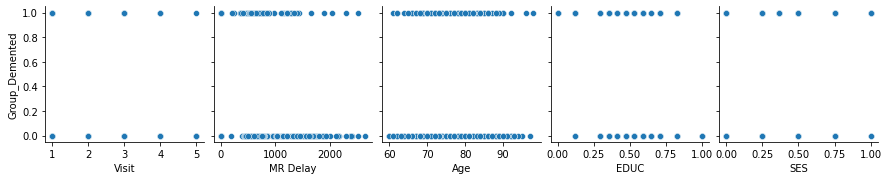

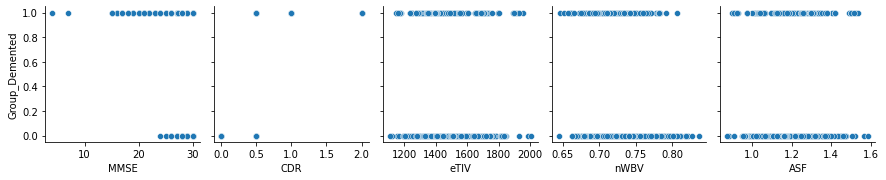

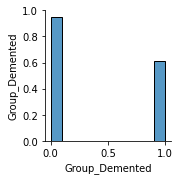

In [ ]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Group_Demented'])

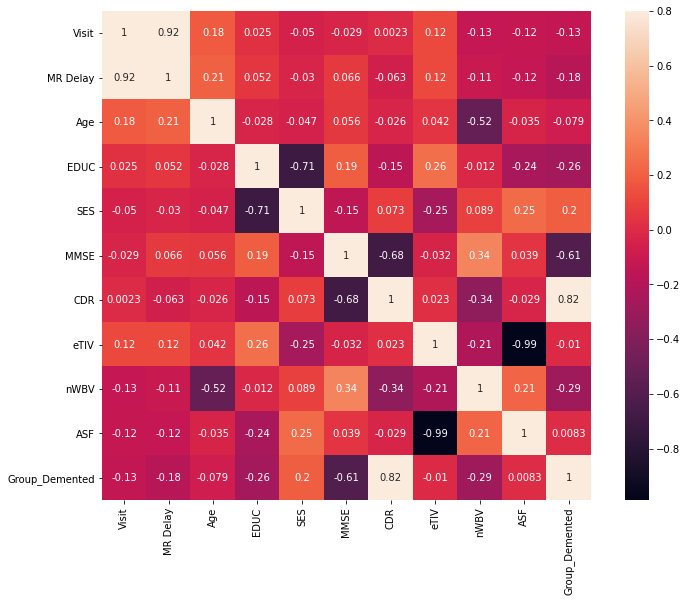

In [ ]:
corrmat = df_num.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


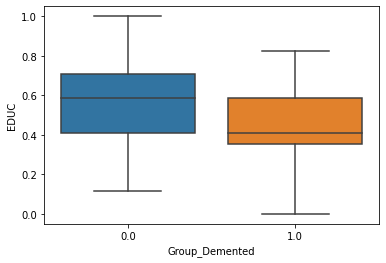

In [ ]:
sns.boxplot('Group_Demented','EDUC', data = df_num)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


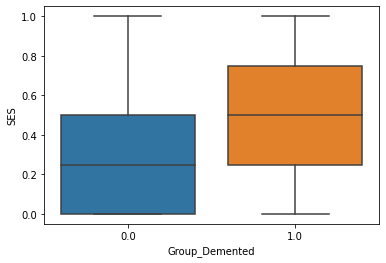

In [ ]:
sns.boxplot('Group_Demented','SES', data = df_num)
plt.show()

TRAINING

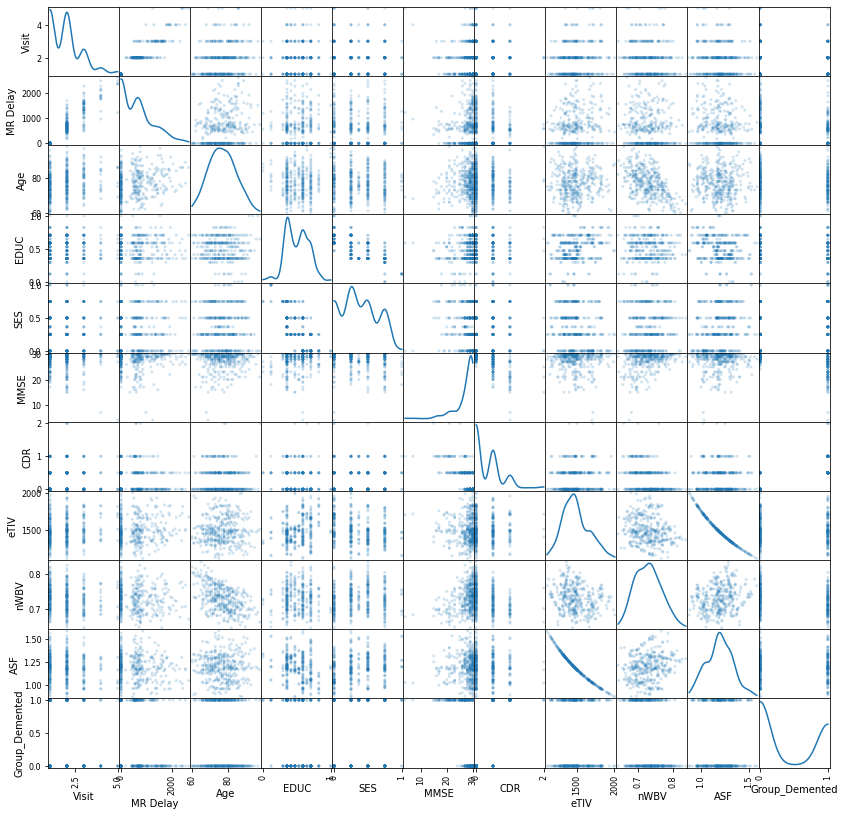

In [ ]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(df_num, alpha=0.2, figsize=(14,14), diagonal='kde')

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage 
from scipy.spatial import distance_matrix
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_num.head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group_Demented
0,1,0,87,0.470588,0.250000,27.0,0.0,1987,0.696,0.883,0.0
1,2,457,88,0.470588,0.250000,30.0,0.0,2004,0.681,0.876,0.0
2,1,0,75,0.352941,0.365113,23.0,0.5,1678,0.736,1.046,1.0
3,2,560,76,0.352941,0.365113,28.0,0.5,1738,0.713,1.010,1.0
4,3,1895,80,0.352941,0.365113,22.0,0.5,1698,0.701,1.034,1.0


In [ ]:
features = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'CDR', 'eTIV', 'nWBV', 'ASF','MMSE']
df_num['Group_Demented'].value_counts()

0.0    227
1.0    146
Name: Group_Demented, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_num[features],
                                                    df_num["Group_Demented"],
                                                    test_size=0.3,
                                                    stratify=df_num['Group_Demented'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)


print("Logistic Regression score (Train): {0:.2}".format(lr.score(X_train, y_train)))
print("Logistic Regression score (Test): {0:.2}".format(lr.score(X_test, y_test)))

Logistic Regression score (Train): 0.97
Logistic Regression score (Test): 0.96


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print("KNN score (Train): {0:.2}".format(neigh.score(X_train, y_train)))
print("KNN score (Test): {0:.2}".format(neigh.score(X_test, y_test)))

KNN score (Train): 0.82
KNN score (Test): 0.55


In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
print("Decision Tree score (Train): {0:.2}".format(dt.score(X_train, y_train)))
print("Decision Tree score (Test): {0:.2}".format(dt.score(X_test, y_test)))

Decision Tree score (Train): 1.0
Decision Tree score (Test): 0.92


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100,
                                criterion='gini',
                                max_depth=5,
                                min_samples_split=10,
                                min_samples_leaf=5,
                                random_state=0)
X_train.head()
forest.fit(X_train, y_train)
print("Random Forest score (Train): {0:.2}".format(forest.score(X_train, y_train)))
print("Random Forest score (Test): {0:.2}".format(forest.score(X_test, y_test)))

Random Forest score (Train): 0.98
Random Forest score (Test): 0.96


In [ ]:
model=lr

CLASSIFICATION PERFORMANCE

In [ ]:
from sklearn.model_selection import cross_val_score
def validate(model, X_train, y_train, k=10):
    result = 'K-fold cross validation:\n'
    scores = cross_val_score(estimator=model,
                             X=X_train,
                             y=y_train,
                             cv=k,
                             n_jobs=1)
    for i, score in enumerate(scores):
        result += "Iteration %d:\t%.3f\n" % (i, score)
    result += 'CV accuracy:\t%.3f +/- %.3f' % (np.mean(scores), np.std(scores))
    return result

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def learningCurve(model, X_train, y_train, k=10):
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=model,
                                   X=X_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=k,
                                   n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.rcParams["figure.figsize"] = [6,6]
    fsize=14
    plt.xticks(fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')
    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples', fontsize=fsize)
    plt.ylabel('Accuracy', fontsize=fsize)
    plt.legend(loc='lower right')
    plt.ylim([0.4, 1.03])
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.model_selection import validation_curve

def validationCurve(model, X_train, y_train,p_name, p_range, k=10, scale=False):
    train_scores, test_scores = validation_curve(
                    estimator=model, 
                    X=X_train, 
                    y=y_train, 
                    param_name=p_name,
                    param_range=p_range,
                    cv=k)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.rcParams["figure.figsize"] = [6,6]
    fsize=14
    plt.xticks(fontsize=fsize)
    plt.yticks(fontsize=fsize)
    plt.plot(p_range, train_mean, 
             color='blue', marker='o', 
             markersize=5, label='training accuracy')

    plt.fill_between(p_range, train_mean + train_std,
                     train_mean - train_std, alpha=0.15,
                     color='blue')

    plt.plot(p_range, test_mean, 
             color='green', linestyle='--', 
             marker='s', markersize=5, 
             label='validation accuracy')

    plt.fill_between(p_range, 
                     test_mean + test_std,
                     test_mean - test_std, 
                     alpha=0.15, color='green')

    plt.grid()
    if scale:
        plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel('Parameter %s' % p_name, fontsize=fsize)
    plt.ylabel('Accuracy', fontsize=fsize)
    plt.ylim([0.7, 1.0])
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def rocCurve(model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.rcParams["figure.figsize"] = [8,8]
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

def confusionMatrix(model, X_train, y_train, X_test, y_test): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.8)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)


print("Logistic Regression score (Train): {0:.2}".format(lr.score(X_train, y_train)))
print("Logistic Regression score (Test): {0:.2}".format(lr.score(X_test, y_test)))
print(validate(lr, X_train, y_train))

Logistic Regression score (Train): 0.97
Logistic Regression score (Test): 0.96
K-fold cross validation:
Iteration 0:	0.963
Iteration 1:	0.962
Iteration 2:	0.962
Iteration 3:	1.000
Iteration 4:	0.962
Iteration 5:	0.962
Iteration 6:	0.962
Iteration 7:	0.962
Iteration 8:	0.962
Iteration 9:	0.923
CV accuracy:	0.962 +/- 0.017


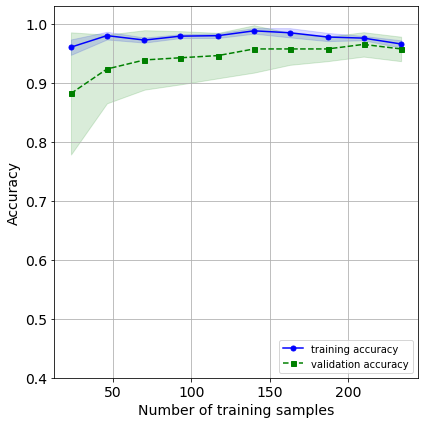

In [ ]:
learningCurve(lr, X_train, y_train)

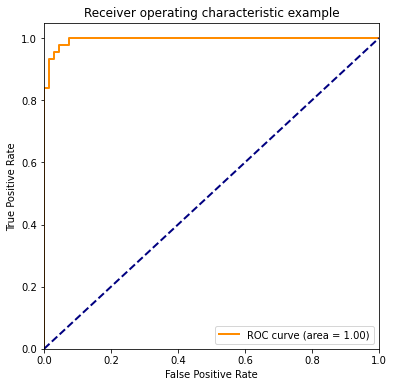

In [ ]:
rocCurve(lr, X_test, y_test)

[[66  2]
 [ 3 41]]


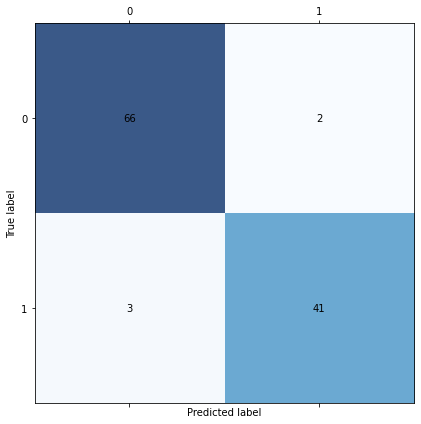

In [ ]:
confusionMatrix(lr, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
print("KNN score (Train): {0:.2}".format(neigh.score(X_train, y_train)))
print("KNN score (Test): {0:.2}".format(neigh.score(X_test, y_test)))
print(validate(neigh, X_train, y_train))

KNN score (Train): 0.82
KNN score (Test): 0.55
K-fold cross validation:
Iteration 0:	0.481
Iteration 1:	0.769
Iteration 2:	0.692
Iteration 3:	0.615
Iteration 4:	0.500
Iteration 5:	0.423
Iteration 6:	0.808
Iteration 7:	0.808
Iteration 8:	0.692
Iteration 9:	0.577
CV accuracy:	0.637 +/- 0.132


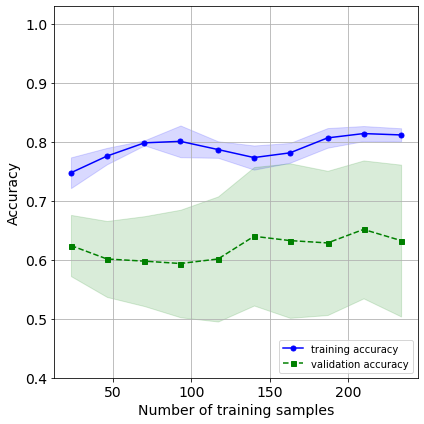

In [ ]:
learningCurve(neigh, X_train, y_train)

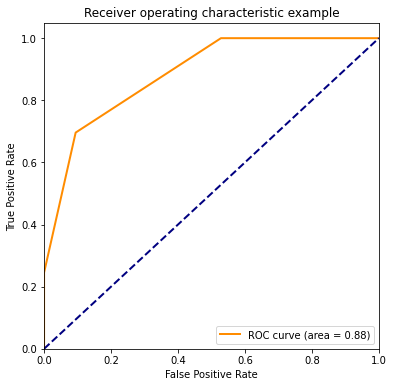

In [ ]:
rocCurve(neigh, X_train, y_train)

[[45 23]
 [27 17]]


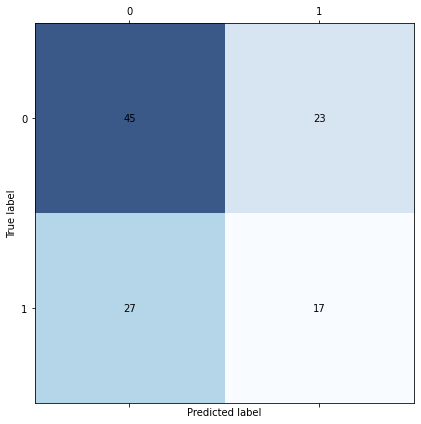

In [ ]:
confusionMatrix(neigh, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
print("Decision Tree score (Train): {0:.2}".format(dt.score(X_train, y_train)))
print("Decision Tree score (Test): {0:.2}".format(dt.score(X_test, y_test)))
print(validate(dt, X_train, y_train))

Decision Tree score (Train): 1.0
Decision Tree score (Test): 0.91
K-fold cross validation:
Iteration 0:	1.000
Iteration 1:	1.000
Iteration 2:	0.923
Iteration 3:	1.000
Iteration 4:	0.923
Iteration 5:	0.962
Iteration 6:	0.962
Iteration 7:	0.846
Iteration 8:	0.923
Iteration 9:	0.885
CV accuracy:	0.942 +/- 0.049


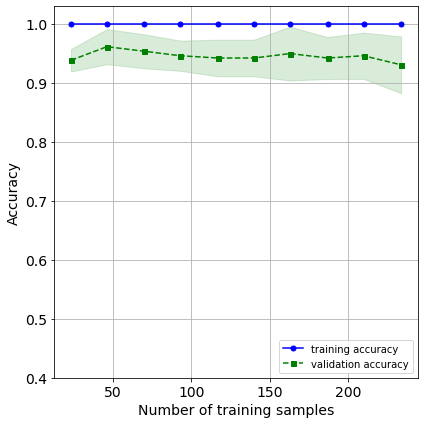

In [ ]:
learningCurve(dt, X_train, y_train)

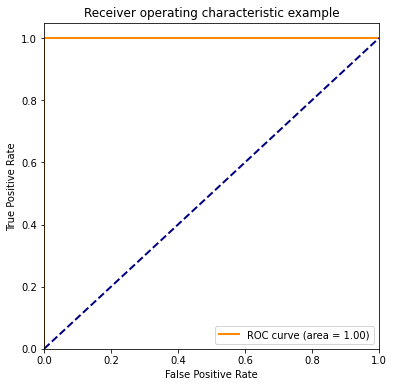

In [ ]:
rocCurve(dt, X_train, y_train)

[[66  2]
 [ 7 37]]


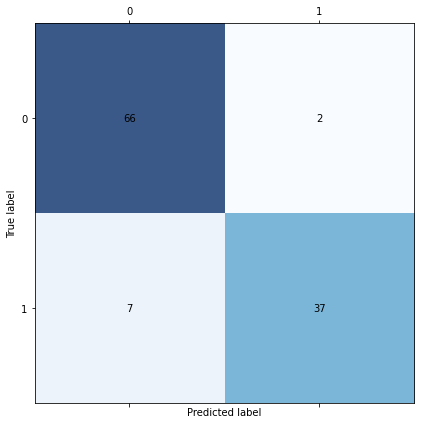

In [ ]:
confusionMatrix(dt, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=3,
                                criterion='gini',
                                max_depth=3,
                                min_samples_split=10,
                                min_samples_leaf=5,
                                random_state=0)
X_train.head()
forest.fit(X_train, y_train)
print("Random Forest score (Train): {0:.2}".format(forest.score(X_train, y_train)))
print("Random Forest score (Test): {0:.2}".format(forest.score(X_test, y_test)))
print(validate(forest, X_train, y_train))

Random Forest score (Train): 0.91
Random Forest score (Test): 0.91
K-fold cross validation:
Iteration 0:	1.000
Iteration 1:	1.000
Iteration 2:	0.962
Iteration 3:	0.962
Iteration 4:	0.962
Iteration 5:	0.923
Iteration 6:	0.962
Iteration 7:	0.923
Iteration 8:	1.000
Iteration 9:	0.923
CV accuracy:	0.962 +/- 0.030


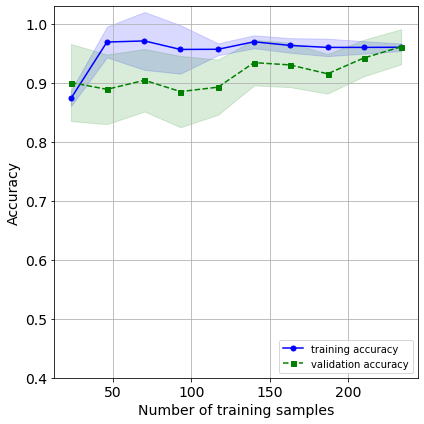

In [ ]:
learningCurve(forest, X_train, y_train)

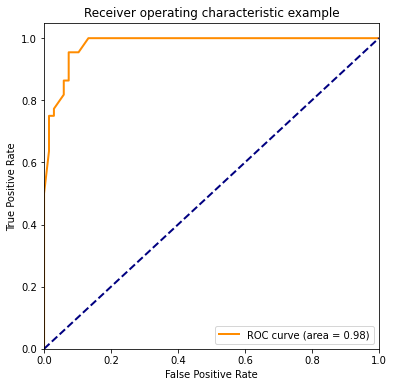

In [ ]:
rocCurve(forest, X_test, y_test)

[[64  4]
 [ 6 38]]


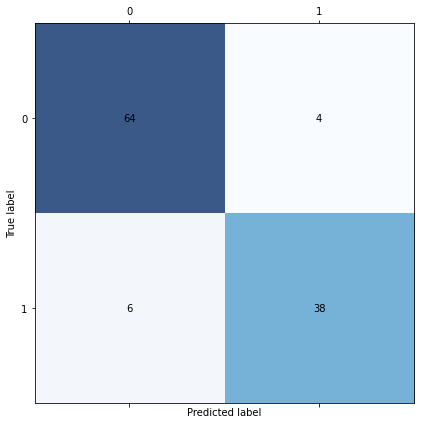

In [ ]:
confusionMatrix(forest, X_train, y_train, X_test, y_test)